<a href="https://colab.research.google.com/github/NestisN/DSE-3-P1/blob/main/Clean_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re
from wordcloud import WordCloud
import missingno as msno

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/My Drive/DSE3/DataAnalyst.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [5]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN


In [6]:
data.isnull().sum()

Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

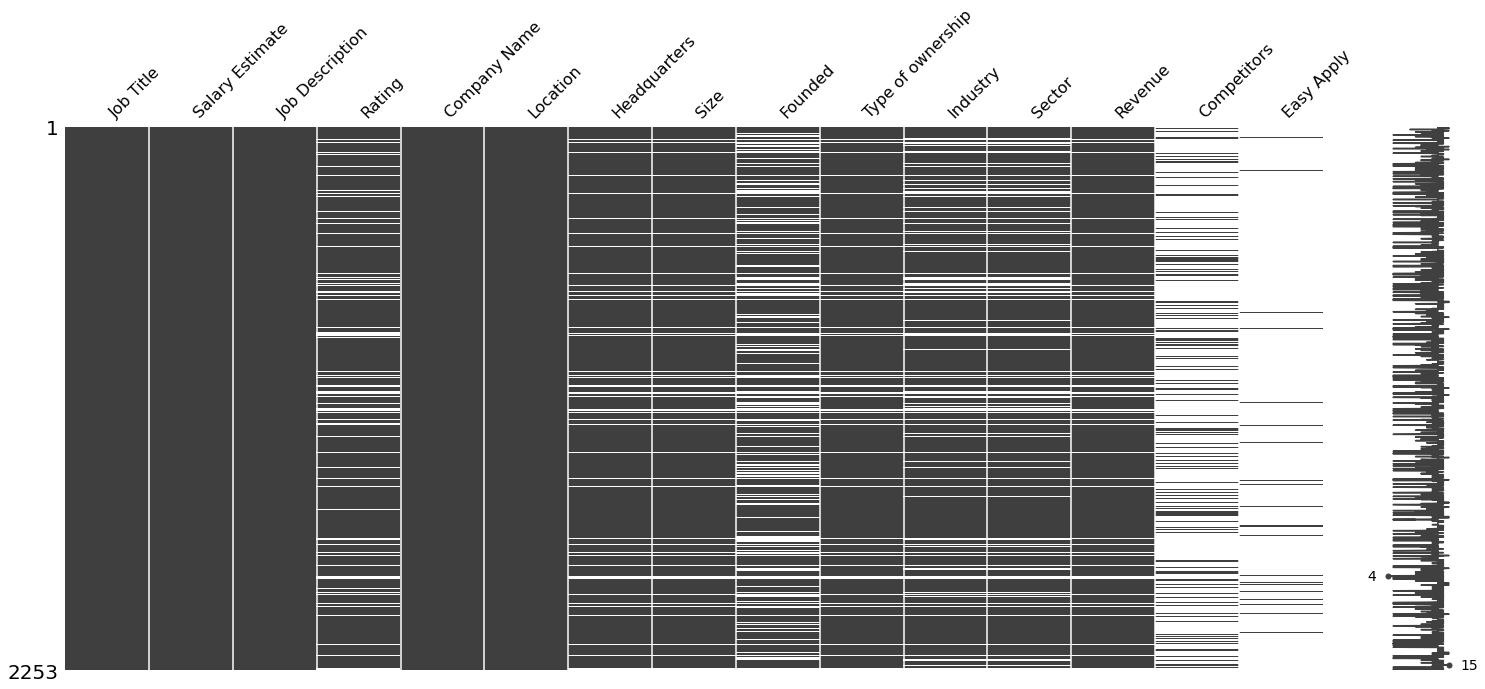

In [7]:
msno.matrix(data)

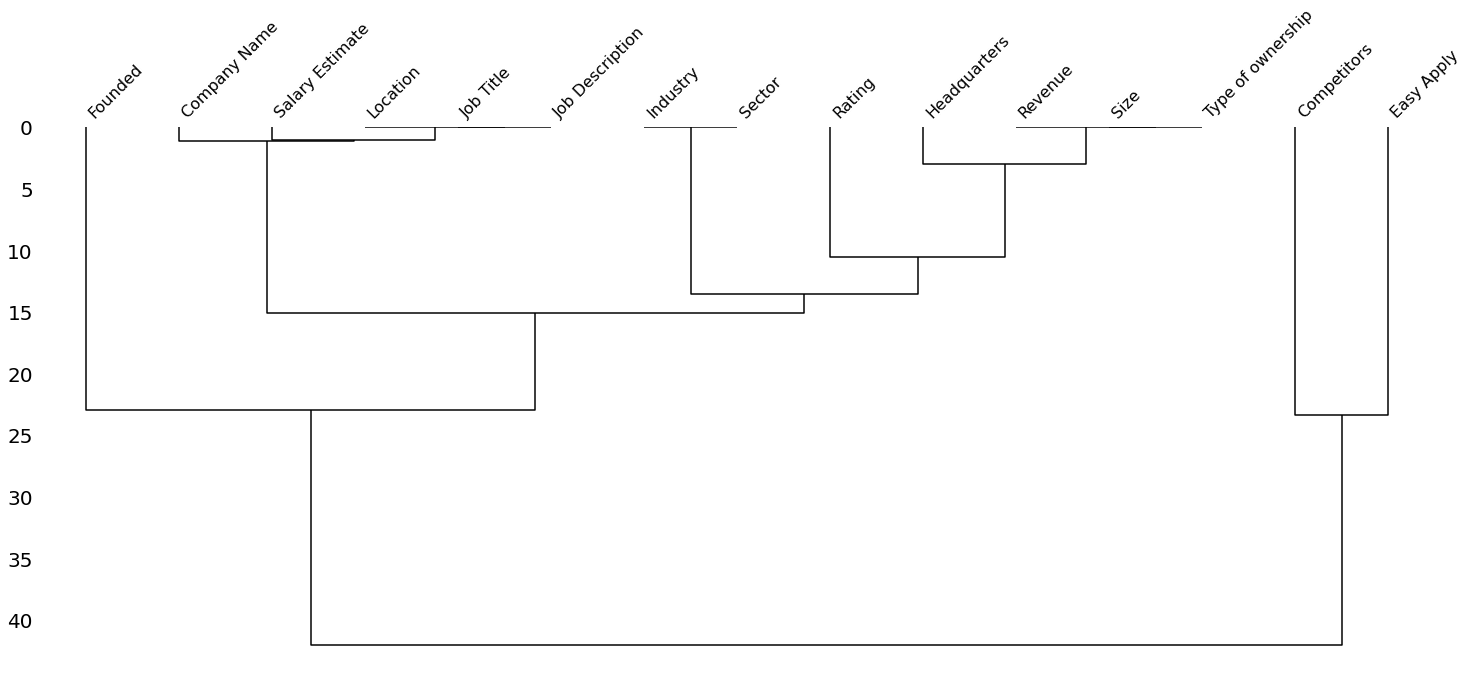

In [8]:
msno.dendrogram(data)

In [9]:
data[data['Salary Estimate'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN


In [11]:
data.dropna(subset=['Salary Estimate'], inplace=True)

In [12]:
data[data['Salary Estimate'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply


In [13]:
data.isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1731
Easy Apply           2172
dtype: int64

In [14]:
data[data['Company Name'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",NaN,NaN,"Mooresville, NC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.dropna(subset=['Company Name'], inplace=True)

In [16]:
data.isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                271
Company Name            0
Location                0
Headquarters          171
Size                  162
Founded               659
Type of ownership     162
Industry              352
Sector                352
Revenue               162
Competitors          1730
Easy Apply           2171
dtype: int64

In [18]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


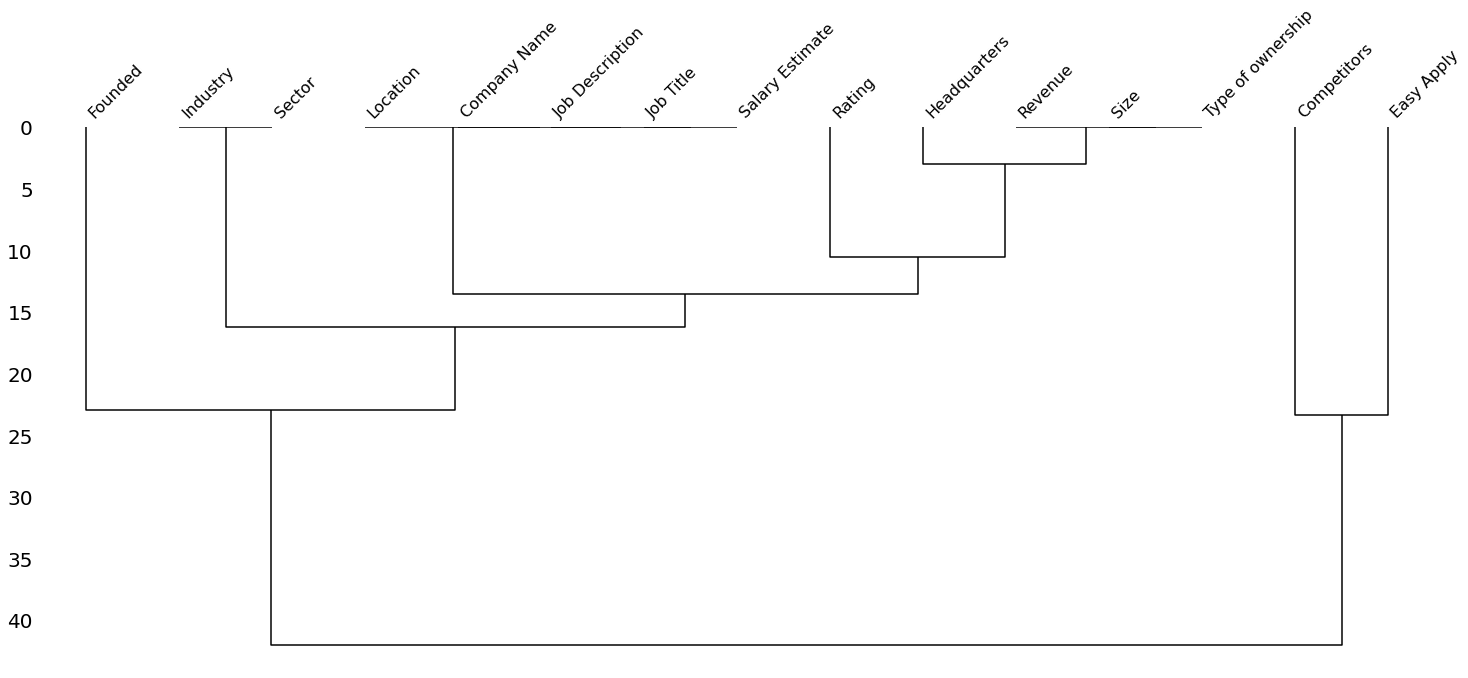

In [17]:
msno.dendrogram(data)

In [19]:
newData=pd.DataFrame(data, columns=["Job Title","Salary Estimate","Job Description","Rating","Company Name","Location","Headquarters","Size","Founded","Type of ownership","Industry","Sector","Revenue"])

In [27]:
newData[newData['Headquarters'].isnull() & newData['Size'].isnull() & newData['Founded'].isnull() & newData['Type of ownership'].isnull() & newData['Industry'].isnull() & newData['Sector'].isnull() & newData['Revenue'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
34,Data Analyst (Games),$46K-$87K (Glassdoor est.),Carry1st is the leading mobile game publisher ...,NaN,Carry1st,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Data Reporting Analyst,$46K-$87K (Glassdoor est.),OverviewThe Data Analyst is a new position in ...,NaN,NADAP NYS INC.,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Data Science Analyst,$51K-$88K (Glassdoor est.),Job Details\n\nLevel\n\nExperienced\n\nJob Loc...,NaN,Greater New York Mutual Insurance Companies (GNY),"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Data Analyst,$51K-$87K (Glassdoor est.),NYU Grossman School of Medicine is one of the ...,NaN,NYU Langone Medical Center,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Data Analyst,$51K-$87K (Glassdoor est.),"Data Analyst\n\nJersey City, NJ\n\n12+ months ...",NaN,Vertex Intel Systems,"Jersey City, NJ",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Data Analyst,$49K-$91K (Glassdoor est.),Role Data Analyst Duration12+ months Location ...,NaN,"TechAspect Solutions, Inc. dba TA Digital","Centennial, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2202,Financial Data Analyst,$49K-$91K (Glassdoor est.),Position:Financial Data AnalystJob Description...,NaN,Black Knight Financial Technology Solutions,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2239,Senior Contract Data Analyst,$78K-$104K (Glassdoor est.),OverviewAmyx is seeking to hire a Senior Contr...,NaN,"Amyx, Iinc.","Aurora, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2246,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),Spiceorb is looking for Technical Business Ana...,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
newData.dropna(subset=["Headquarters","Size","Founded","Type of ownership","Industry","Sector","Revenue"], inplace=True)

In [29]:
newData[newData['Headquarters'].isnull() & newData['Size'].isnull() & newData['Founded'].isnull() & newData['Type of ownership'].isnull() & newData['Industry'].isnull() & newData['Sector'].isnull() & newData['Revenue'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue


In [30]:
newData

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,Data Analyst-(Remote- All across,$78K-$104K (Glassdoor est.),About CenturyLink\n\nCenturyLink (NYSE: CTL) i...,3.0,CenturyLink\n3.0,"Broomfield, CO","Monroe, LA",10000+ employees,1930.0,Company - Public,"Cable, Internet & Telephone Providers",Telecommunications,$10+ billion (USD)
2245,Data Analyst Supporting the DEA #20-242,$78K-$104K (Glassdoor est.),Salary:\nPublished Job Title:\nData Analyst Su...,2.8,Forfeiture Support Associates\n2.8,"Centennial, CO","Ashburn, VA",1001 to 5000 employees,2004.0,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD)
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD)
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD)


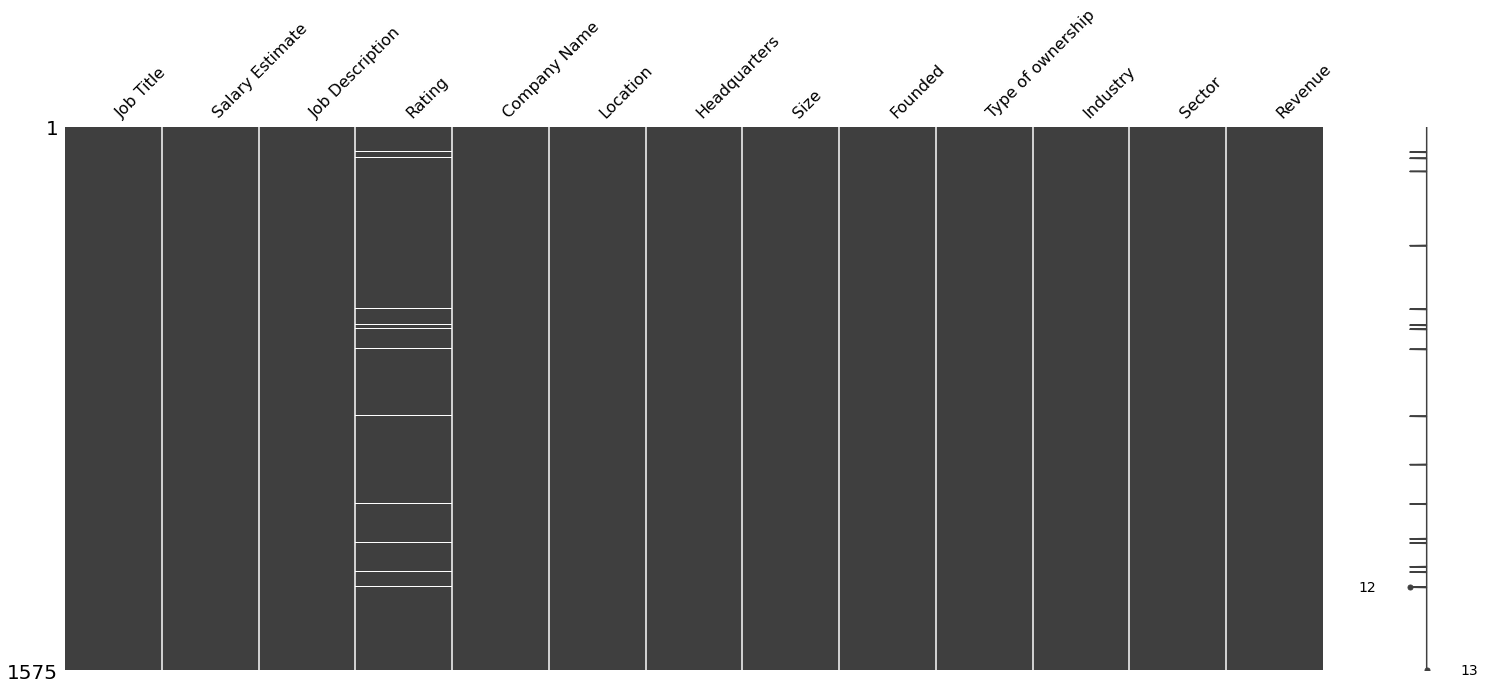

In [32]:
msno.matrix(newData)